In [2]:
from CTGAN import *
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set global random seed
import numpy as np
np.random.seed(42)

!! THINGS TO FIX !!

- Huge variability in metrics between runs. Cross val? Set seed?
- Actually look at what is causing the warnings...

# Setup

In [5]:
real_data = pd.read_csv('../data/back_pain.csv', header=0)
real_data = real_data.drop('Unnamed: 13', axis=1)

i_ds1 = SDVInputDataset(real_dataframe=real_data)
o_ds1 = SDVOutputDataset(len(i_ds1.dataset))
rp_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'])

In [6]:
i_ds1.dataset.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [7]:
rp_ds1.models_to_run

['ctgan', 'copulagan', 'tvae']

# Generate Data

In [8]:
test_dict = sdv_dataset_synthesizer(input_dataset=i_ds1,
                            output_dataset=o_ds1,
                            run_params=rp_ds1)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 20.32it/s]

Running for ctgan
Running for copulagan
Running for tvae


In [9]:
test_dict['real'] = i_ds1.dataset

In [10]:
for item in test_dict.keys():
    print(item)

ctgan
copulagan
tvae
real


# Explore Datasets

In [11]:
test_dict['ctgan']

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,49.217153,21.544717,28.540134,37.723097,147.239008,133.439701,0.087282,32.602297,19.793108,7.296180,-14.491884,50.936626,Abnormal
1,47.542028,4.681216,66.363349,55.527743,165.829744,-5.941339,0.424146,18.748692,20.568631,13.413718,-45.051987,43.845022,Normal
2,64.724480,6.349825,24.082354,13.513356,152.528034,-2.302451,0.259697,24.843052,18.216996,6.971956,-32.397428,32.835900,Normal
3,50.794311,-1.773519,67.808628,39.591045,148.315989,1.246699,0.032600,18.630090,12.497259,9.754799,-40.549809,31.778217,Abnormal
4,61.859182,25.364587,31.490097,45.283691,168.124438,47.182292,-0.084204,10.806418,21.169355,6.674606,-12.084347,8.832189,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,101.744081,2.936160,65.390010,50.669559,160.435294,60.490702,-0.172608,25.684434,14.412270,8.806452,-39.502628,42.274017,Abnormal
306,98.225039,-7.211385,35.550710,66.676883,145.498406,148.601530,-0.091225,7.500613,18.368261,6.284157,-28.548028,47.184054,Normal
307,77.837868,6.497164,29.376918,42.473948,145.621911,97.654818,0.168670,24.416383,17.920241,16.354767,-7.212947,26.142434,Abnormal
308,79.412569,13.849587,38.675883,66.725964,107.337131,5.151275,0.043625,20.887716,18.019795,7.733446,-38.791155,35.233315,Normal


In [12]:
test_dict['copulagan']

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,65.708867,5.319557,19.703845,58.344128,110.598889,-7.382110,0.154902,18.531850,7.144757,14.557379,-18.173582,42.248270,Abnormal
1,72.259328,0.853952,42.374602,67.606569,86.142205,3.855745,0.607257,7.080200,9.424562,16.815208,-33.553375,41.914957,Abnormal
2,91.577971,12.770488,11.401324,34.508829,115.511682,84.391327,0.247707,28.065613,12.568748,13.904773,6.675202,23.240516,Normal
3,81.303885,15.144678,58.385577,16.720527,141.236235,14.563937,0.686503,10.777971,14.133297,16.815584,-5.059230,34.534514,Normal
4,57.972326,3.656493,27.947410,37.506977,95.617993,2.199571,0.664313,13.461876,7.613063,14.113141,-10.839658,26.241214,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,70.766505,9.773024,60.607864,51.017882,109.787598,-0.940696,0.824164,22.138516,15.561239,10.537376,-24.319265,37.670474,Abnormal
306,31.295840,14.256878,67.155273,56.636246,120.296619,8.972088,0.904608,8.116487,8.078927,16.817907,-18.973490,44.311920,Abnormal
307,57.876147,23.328642,46.253957,69.182290,118.826658,64.345510,0.692416,31.273845,9.624657,10.558088,-30.877885,43.535494,Abnormal
308,92.270637,20.124434,33.320975,34.024275,114.840058,-14.917827,0.329758,36.217390,10.848076,14.108169,-13.548377,41.226526,Abnormal


In [13]:
test_dict['tvae']

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,87.920256,10.129306,39.324067,32.613331,123.080905,86.324476,0.237542,30.190242,11.390174,9.064423,-25.648684,33.848587,Abnormal
1,43.029400,13.857536,66.121882,39.568401,122.339557,123.900785,0.265364,13.431658,14.376932,16.576605,-17.644605,32.875442,Abnormal
2,66.246780,7.966400,60.152253,33.029677,104.539554,352.189695,0.307582,23.844848,12.727089,15.133630,-27.526623,36.033782,Abnormal
3,63.982161,19.280331,62.902781,30.851621,125.772383,243.783571,0.319972,9.114431,12.529155,14.764405,-0.860677,37.229444,Abnormal
4,71.766380,6.613131,69.922689,56.457187,105.532074,32.985550,0.237724,21.798177,14.073530,15.028912,-20.276404,32.768453,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,38.816637,13.978471,67.974886,32.002535,109.039071,97.758268,0.206407,17.301064,12.796100,8.238083,-23.763058,34.576071,Abnormal
306,40.091056,11.416405,54.532247,32.019226,136.089121,221.398316,0.430535,24.553348,9.503606,15.504211,-17.585410,36.188495,Abnormal
307,79.713468,5.613440,72.251651,31.141491,95.478872,155.109280,0.274321,30.225359,10.679322,8.645309,-20.831442,38.175335,Abnormal
308,38.472863,11.368681,57.446502,30.685444,135.668543,156.058631,0.530201,21.648768,8.569949,15.054967,-9.367088,32.412693,Abnormal


## Dataset characteristics

In [14]:
test_dict['ctgan'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,71.695394,5.938096,43.467637,47.567777,134.247332,38.283452,0.159084,19.723286,17.200120,10.076109,-19.565156,36.444571
std,20.504565,13.405823,21.155084,14.927955,16.626180,43.695814,0.284876,9.085543,3.477019,3.199817,14.045877,10.469362
min,17.633231,-20.797738,1.487309,13.513356,76.650010,-49.987348,-0.266605,-1.946851,6.985505,4.669254,-48.552877,0.145521
25%,56.213625,-2.662229,29.007319,36.916991,122.665616,3.457086,-0.067085,13.001667,14.842670,7.220045,-31.813969,29.134237
50%,70.002078,4.425552,41.218627,47.587842,134.600369,23.457246,0.081781,19.384338,18.088471,9.769769,-17.716065,37.009174
75%,87.514526,14.173758,55.173231,57.141792,145.495686,62.901045,0.349850,25.849408,19.914927,12.465622,-9.104773,44.846508
max,114.272926,55.654011,109.413907,88.105603,178.129581,170.816965,1.123313,42.266376,23.006437,18.123281,8.431885,56.546682


In [15]:
test_dict['copulagan'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,63.578079,10.427027,40.539143,55.290208,109.287790,7.156774,0.595905,19.557166,13.222623,13.360882,-20.779498,35.511821
std,19.985443,8.884965,21.291855,16.962632,18.738151,25.009905,0.334654,9.957024,4.155498,2.963600,13.772227,10.461462
min,27.351998,-9.869716,10.940351,12.891014,58.442131,-24.873657,0.003551,7.033931,7.041813,7.040071,-35.255368,7.398173
25%,47.469745,4.824380,23.372843,44.391044,97.696162,-7.591331,0.283154,9.812167,9.401386,11.157543,-33.550245,30.847843
50%,63.450248,9.726458,35.309212,55.746086,112.023396,0.627766,0.688414,18.404678,13.286436,14.110655,-25.074480,40.480095
75%,77.126165,15.350526,54.464912,68.703314,119.903628,11.282197,0.921896,28.813079,17.560312,15.930504,-11.358698,43.525379
max,111.064187,58.980794,120.883654,94.519802,158.678370,139.343861,0.998804,36.732594,19.319891,16.820615,6.944138,44.339610


In [16]:
test_dict['tvae'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,58.273820,14.272302,61.455635,37.462177,116.863006,231.435769,0.405522,17.668039,11.786442,13.541131,-18.324942,34.115315
std,20.018660,4.621724,10.008029,6.657878,9.404027,98.801708,0.224772,6.346849,1.564700,2.939489,5.616877,3.767973
min,34.123367,1.748287,35.220399,25.320859,84.834378,-0.251311,0.132431,5.746119,7.255227,7.439624,-32.453716,18.154503
25%,43.953133,11.466474,55.191290,33.309980,110.451758,164.262088,0.226691,11.306209,10.680794,10.696978,-22.103201,32.556917
50%,48.741510,13.944449,62.903495,36.315218,116.942127,233.720234,0.297847,18.057582,11.790386,14.949034,-18.682961,34.483506
75%,71.271318,16.046168,68.760435,39.130297,121.925981,295.184730,0.578590,23.190415,12.841200,15.500584,-14.896042,36.218175
max,128.697171,42.163745,82.662458,61.746293,148.362673,506.449770,1.002492,30.225359,16.826880,17.033796,-0.860677,42.329979


In [17]:
test_dict['real'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


# Assessment Functions

The output of the metrics will be the 1 minus the average ROC AUC score across all the cross validation splits.

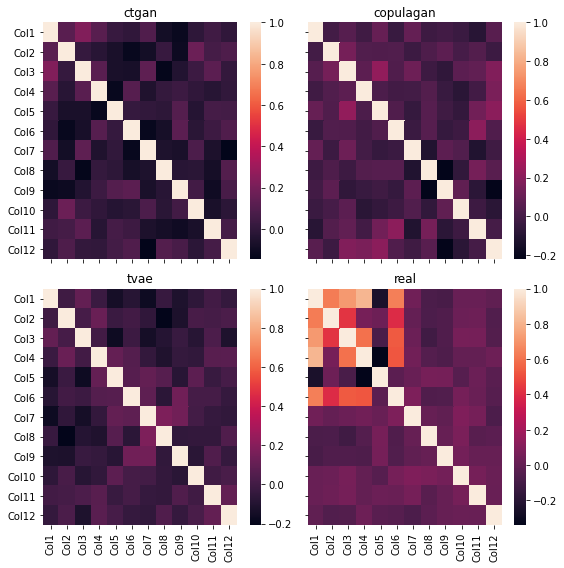

In [18]:
corr_plot(test_dict)

We can see that the correlation has been poorly preserved.

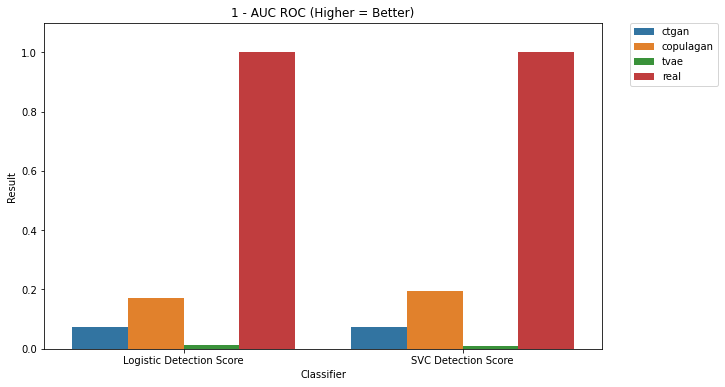

In [19]:
plot_classifier_metrics(simple_metrics(test_dict, input_dataset=i_ds1))

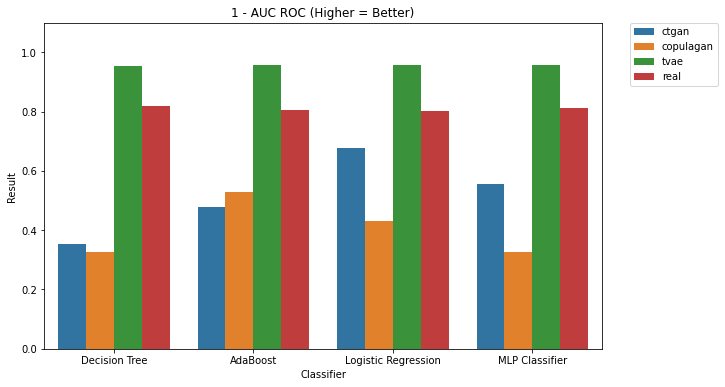

In [20]:
plot_classifier_metrics(classifier_comparison(test_dict, input_dataset= i_ds1, 
                                              target_col='Class_att'))

# View impact of other params

In [21]:
def model_run(input_dataset, output_dataset, run_params, target_col):

    df_dict = sdv_dataset_synthesizer(input_dataset=input_dataset,
                                      output_dataset=output_dataset,
                                      run_params=run_params)

    df_dict['real'] = input_dataset.dataset
    
    corr_plot(df_dict)
    plot_classifier_metrics(simple_metrics(df_dict, 
                                           input_dataset=input_dataset))
    
    plot_classifier_metrics(classifier_comparison(df_dict, 
                                                  input_dataset=input_dataset,
                                                  target_col=target_col))
    
    return df_dict

## More epochs, smaller batch size

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19.66it/s]


Running for ctgan
Running for copulagan
Running for tvae


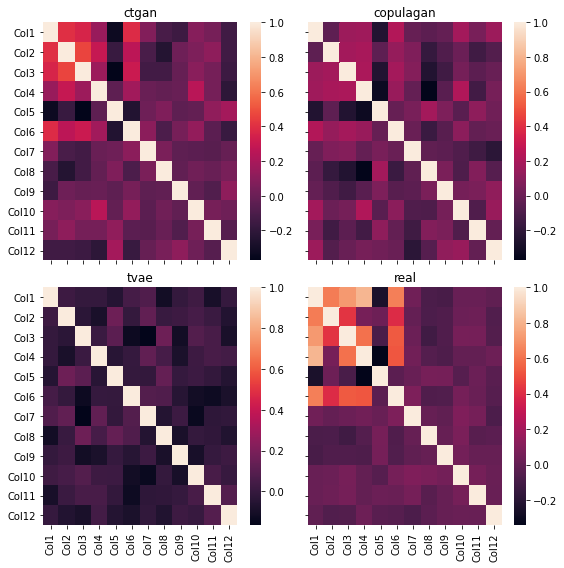

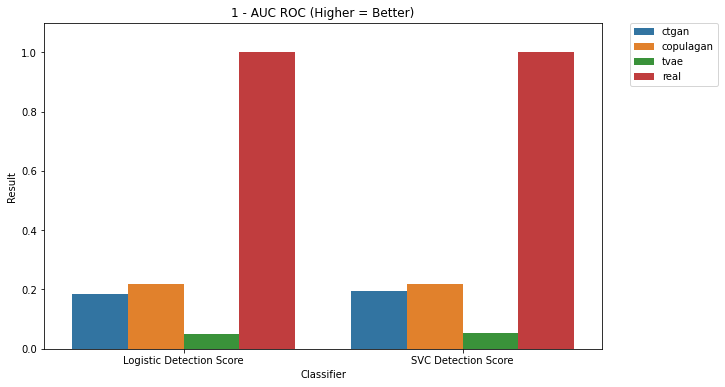

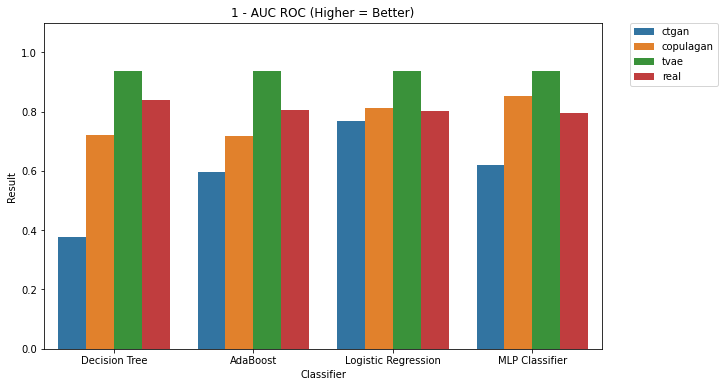

In [22]:
rp2_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=500, batch_size=100)

v2_df_dict = model_run(input_dataset=i_ds1, output_dataset=o_ds1, 
          run_params=rp2_ds1, 
          target_col='Class_att')

## More layers - 3 layers per network (default = 2)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19.66it/s]


Running for ctgan
Running for copulagan
Running for tvae


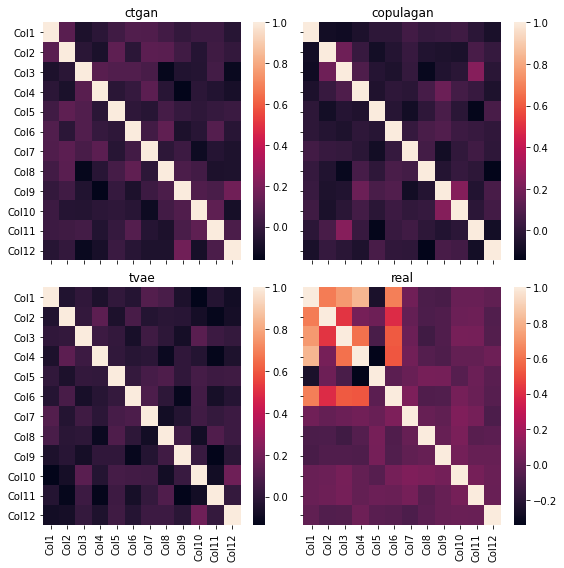

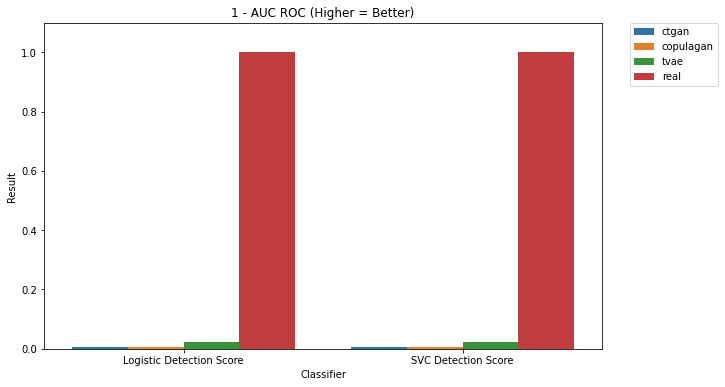

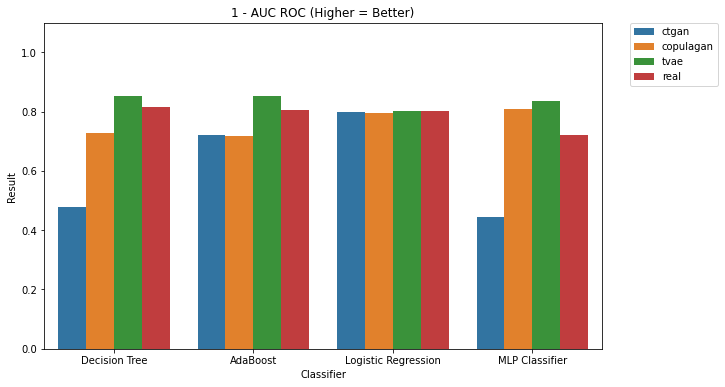

In [23]:
rp3_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             generator_dim=(256, 256, 256),
                             discriminator_dim=(256, 256, 256))

v3_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp3_ds1, 
          target_col='Class_att')

## Even more layers - 4 layers per network

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.34it/s]


Running for ctgan
Running for copulagan
Running for tvae


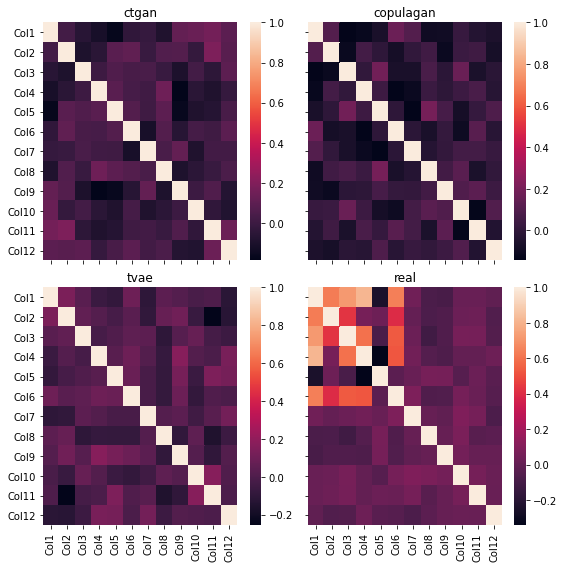

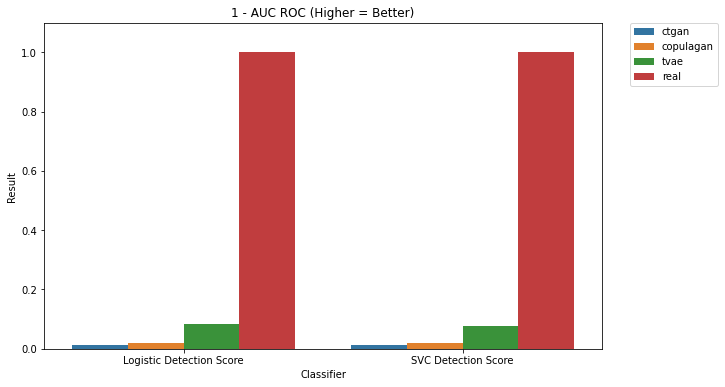

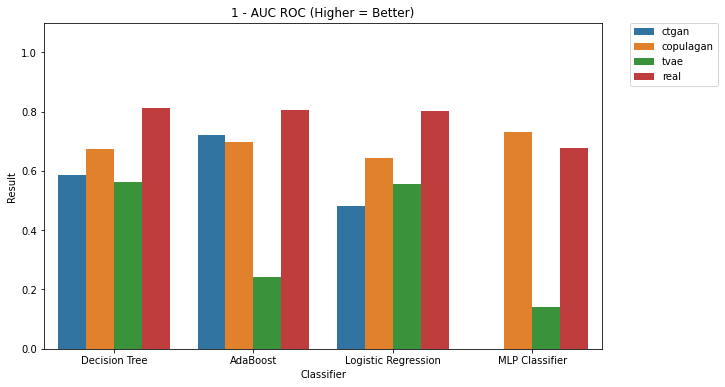

In [24]:
rp4_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             generator_dim=(256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256))

v4_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp4_ds1, 
          target_col='Class_att')

## Even more layers (again) - 5 layers per network

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.49it/s]


Running for ctgan
Running for copulagan
Running for tvae


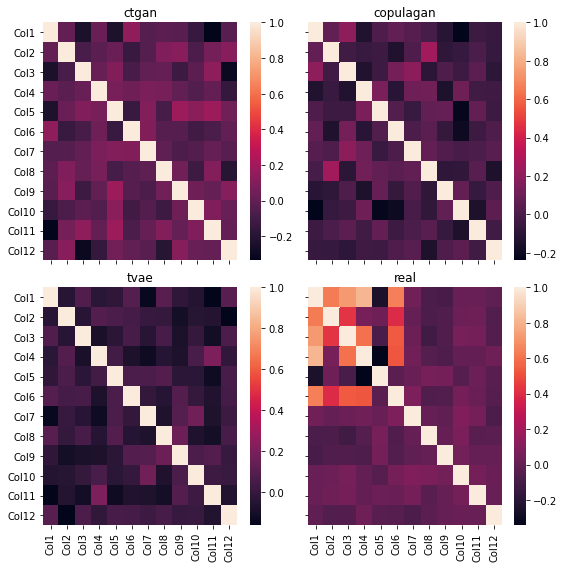

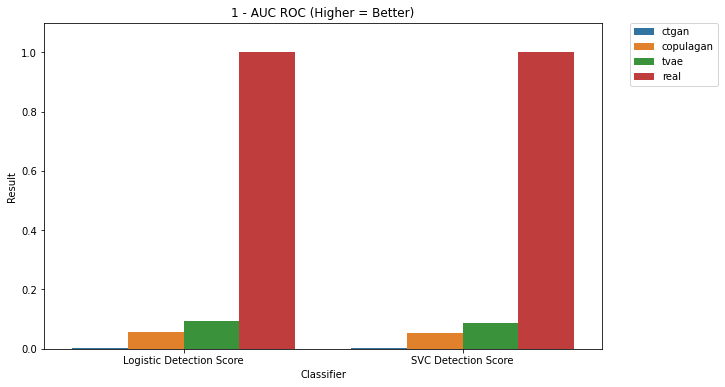

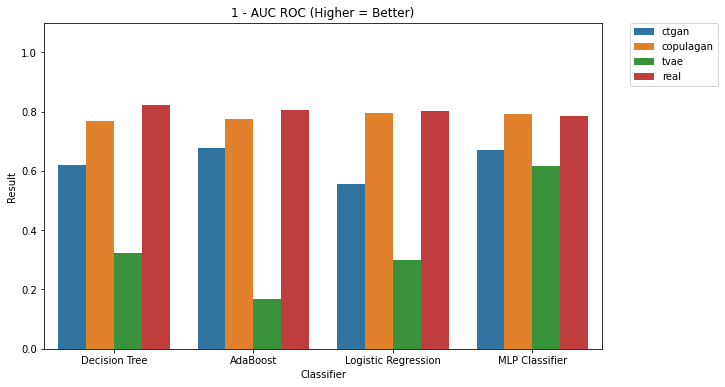

In [25]:
rp5_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             generator_dim=(256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256))

v5_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp5_ds1, 
          target_col='Class_att')

## 5 layers (unchanged from previous run), longer training too

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.09it/s]


Running for ctgan
Running for copulagan
Running for tvae


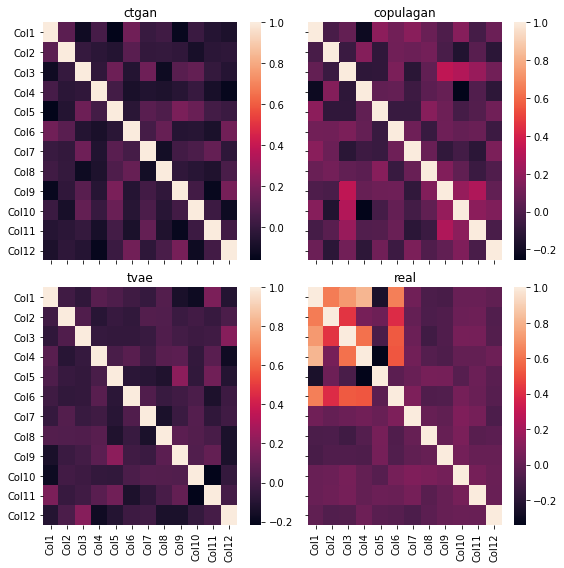

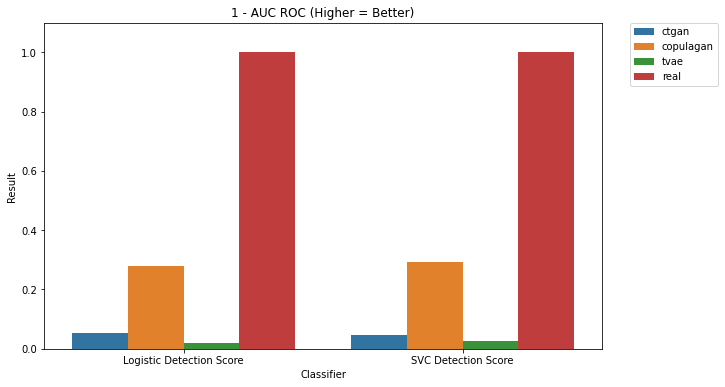

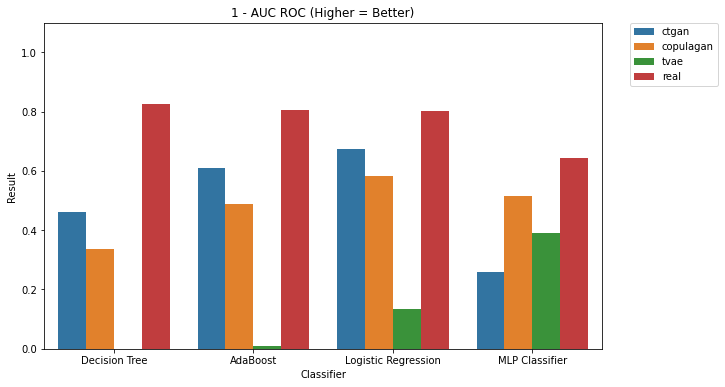

In [26]:
rp6_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=500,
                             generator_dim=(256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256))

v6_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp6_ds1, 
          target_col='Class_att')

## 5 layers (unchanged from previous run), longer training (unchanged from previous run), smaller batch size

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 11.90it/s]

Running for ctgan
Running for copulagan
Running for tvae


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.00it/s]


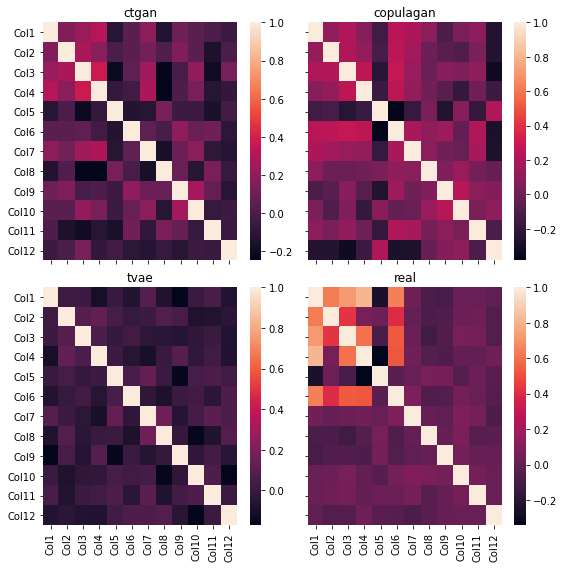

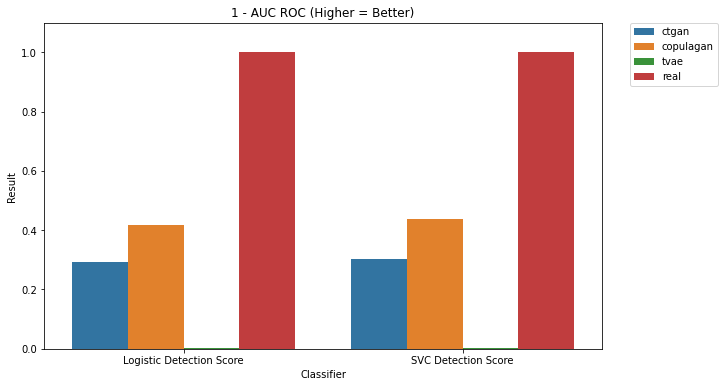

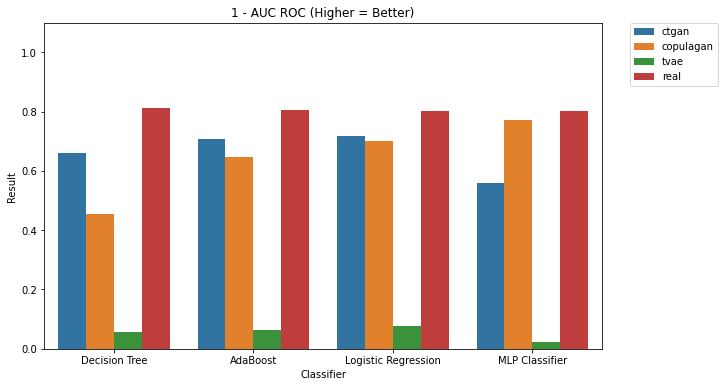

In [27]:
rp7_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=500, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256))

v7_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp7_ds1, 
          target_col='Class_att')

## Increase run length further (500 --> 1000 epochs)

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 12.01it/s]

Running for ctgan
Running for copulagan
Running for tvae


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.17it/s]


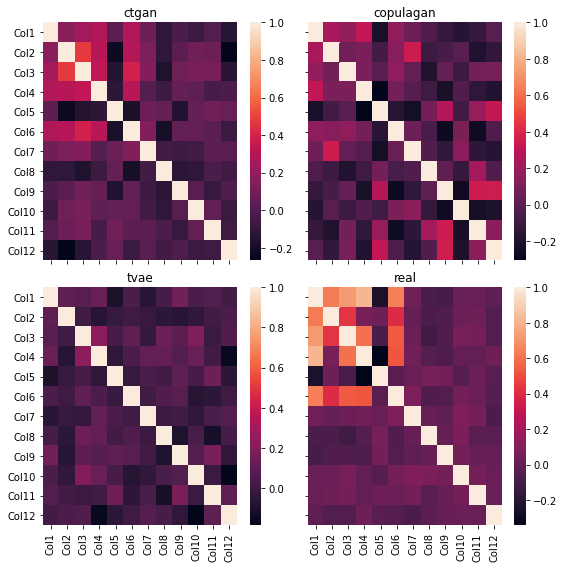

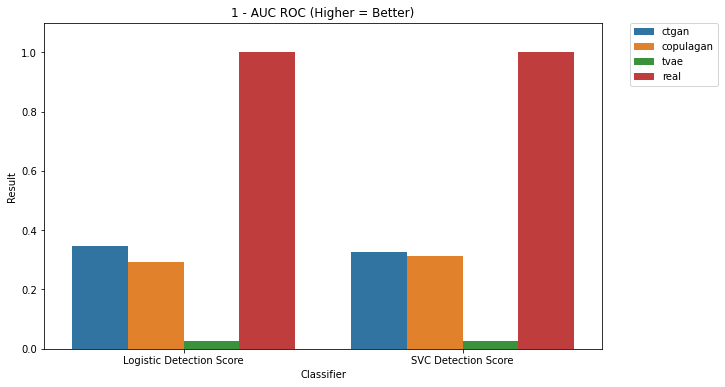

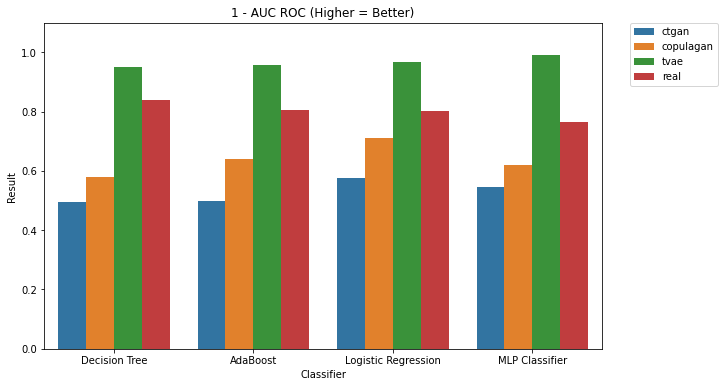

In [28]:
rp8_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=1000, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256))

v8_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp8_ds1, 
          target_col='Class_att')

For the first time we've started to see a correlation pattern that is similar to that observed in the real dataset with CTGAN.

However, the data is still being detected as fake, and it isn't performing all that well in 

In [29]:
v8_df_dict['ctgan'].to_csv('../syn_data/back_pain_ctgan_bergam0t_v1.csv')
v8_df_dict['copulagan'].to_csv('../syn_data/back_pain_copulagan_bergam0t_v1.csv')
v8_df_dict['tvae'].to_csv('../syn_data/back_pain_tvae_bergam0t_v1.csv')

## Increase run length even further (1000 --> 2000 epochs)

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 11.87it/s]

Running for ctgan
Running for copulagan
Running for tvae


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.00it/s]


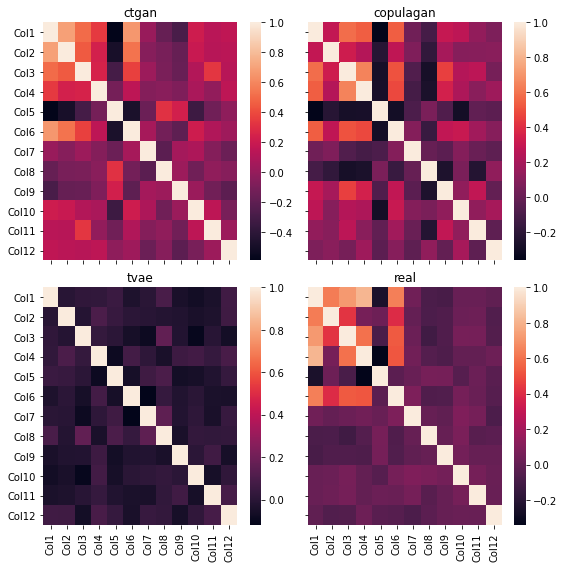

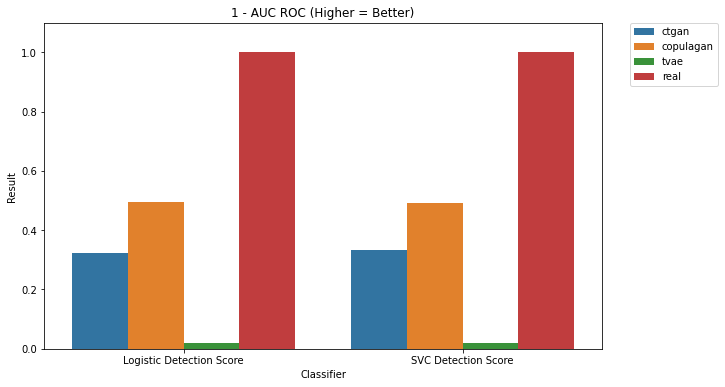

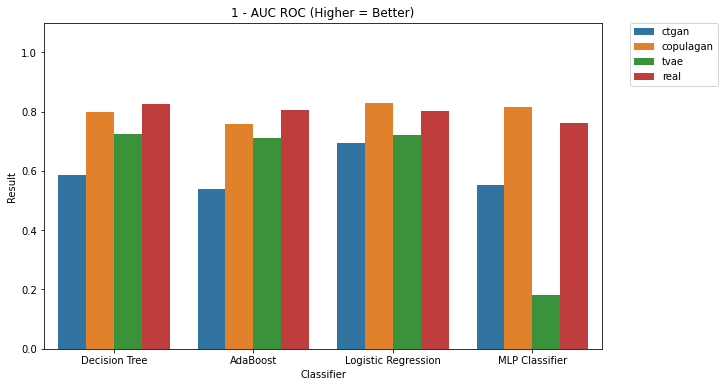

In [30]:
rp9_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=2000, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256))

v9_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp9_ds1, 
          target_col='Class_att')

In [31]:
v9_df_dict['ctgan'].to_csv('../syn_data/back_pain_ctgan_bergam0t_v2.csv')
v9_df_dict['copulagan'].to_csv('../syn_data/back_pain_copulagan_bergam0t_v2.csv')
v9_df_dict['tvae'].to_csv('../syn_data/back_pain_tvae_bergam0t_v2.csv')

## Add another layer (5 --> 6) and use 2000 epochs

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 10.90it/s]

Running for ctgan
Running for copulagan


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.89it/s]


Running for tvae


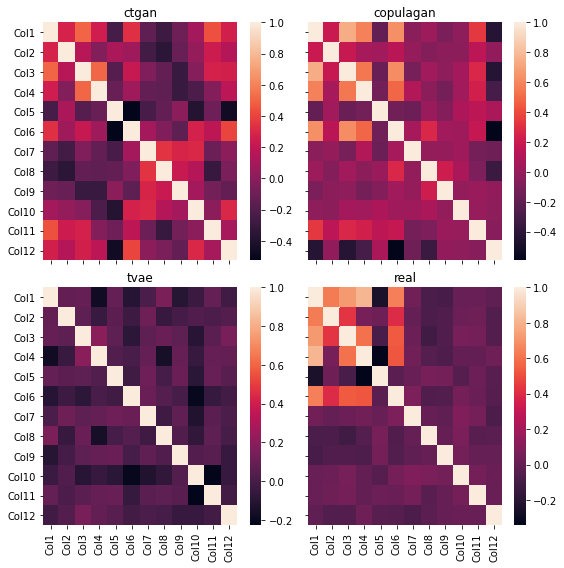

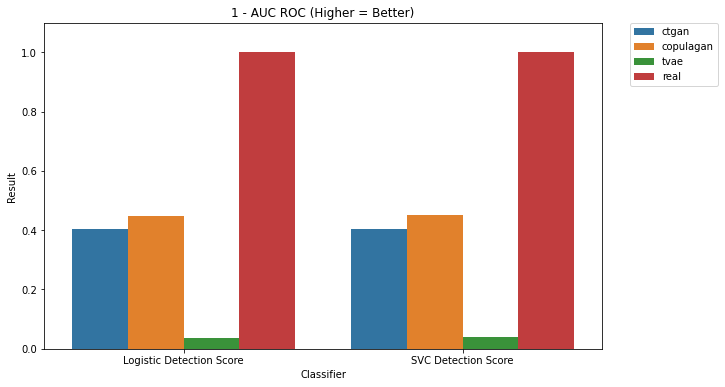

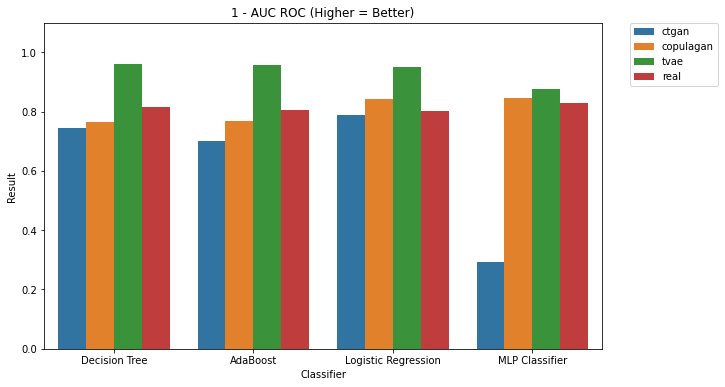

In [32]:
rp10_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=2000, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256, 256))

v10_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp10_ds1, 
          target_col='Class_att')

In [33]:
v10_df_dict['ctgan'].to_csv('../syn_data/back_pain_ctgan_bergam0t_v3.csv')
v10_df_dict['copulagan'].to_csv('../syn_data/back_pain_copulagan_bergam0t_v3.csv')
v10_df_dict['tvae'].to_csv('../syn_data/back_pain_tvae_bergam0t_v3.csv')

# Look at features of datasets

In [34]:
v10_df_dict['copulagan'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,59.627232,18.155541,50.849214,41.803277,109.942941,26.025281,0.373037,24.517790,12.333363,10.967896,-22.666609,24.404713
std,21.329847,7.699334,23.112051,12.212822,13.711701,33.710862,0.265567,8.080992,3.048996,2.902405,10.793276,11.528617
min,28.140213,-0.617635,14.184491,15.196299,73.116849,-13.066503,0.003706,7.442381,7.321208,7.052790,-35.225438,7.087572
25%,42.173349,12.816615,33.998530,32.101561,100.805984,0.562613,0.118351,18.892548,9.901644,8.458730,-32.012792,13.615640
50%,53.417281,17.248989,45.550378,42.401141,112.248568,8.433345,0.379883,25.757763,12.176227,10.240269,-24.822784,23.588787
75%,76.656251,23.202337,62.605334,51.517625,119.931714,48.836750,0.573988,31.060523,14.794411,13.504145,-15.354604,34.567408
max,109.878498,42.289529,127.744323,74.537573,149.140779,133.985618,0.932698,36.335387,18.671348,16.752738,6.312470,44.324726


In [35]:
v10_df_dict['real'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


<AxesSubplot:>

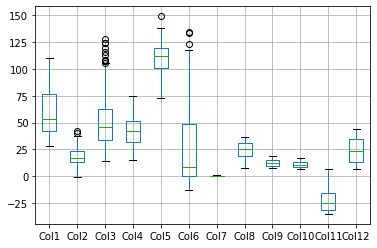

In [38]:
v10_df_dict['copulagan'].boxplot()

<AxesSubplot:>

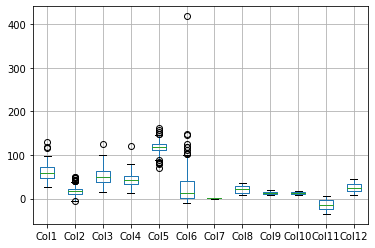

In [41]:
v10_df_dict['real'].boxplot()

<AxesSubplot:>

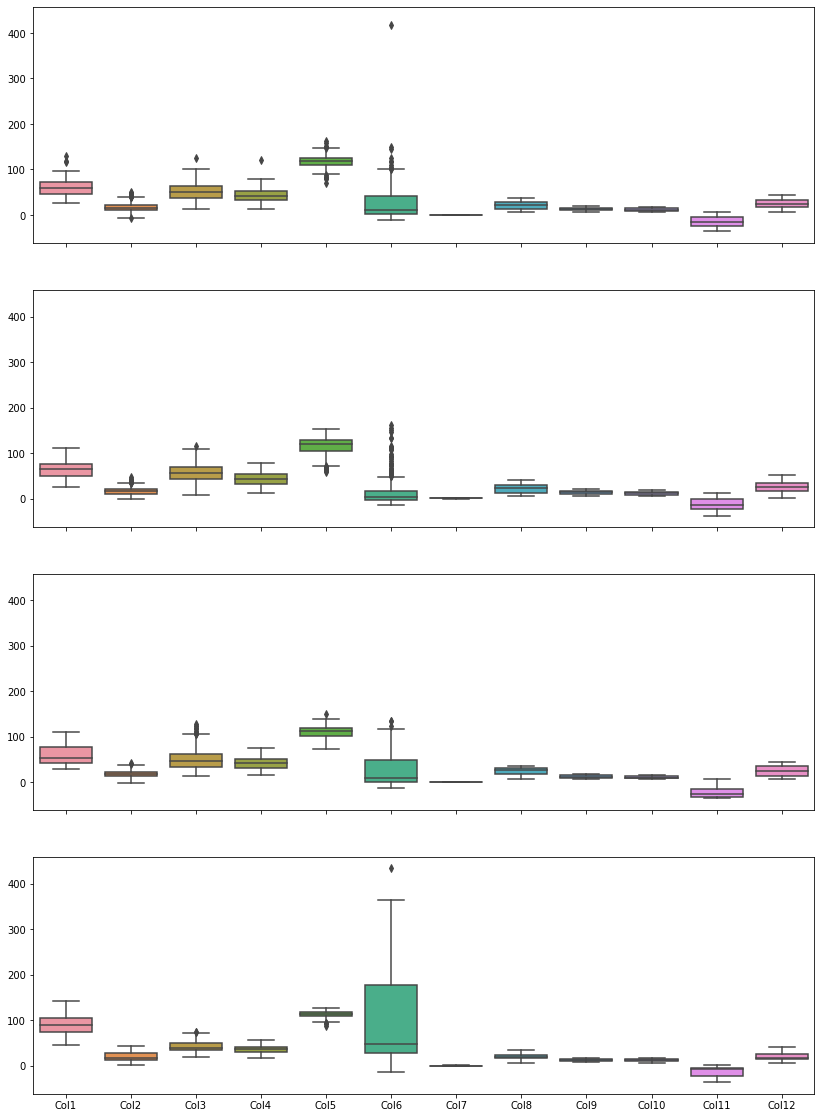

In [48]:
fix, ax = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(14, 20))

sns.boxplot(data=v10_df_dict['real'], ax=ax.flatten()[0])
sns.boxplot(data=v10_df_dict['ctgan'], ax=ax.flatten()[1])
sns.boxplot(data=v10_df_dict['copulagan'], ax=ax.flatten()[2])
sns.boxplot(data=v10_df_dict['tvae'], ax=ax.flatten()[3])

In [51]:
real_plotting = v10_df_dict['real']
real_plotting['dataset'] = 'Real'

ctgan_plotting = v10_df_dict['ctgan']
ctgan_plotting['dataset'] = 'CTGAN'

copulagan_plotting = v10_df_dict['copulagan']
copulagan_plotting['dataset'] = 'CopulaGAN'

tvae_plotting = v10_df_dict['tvae']
tvae_plotting['dataset'] = 'TVAE'



In [74]:
mike_plotting = pd.read_csv('../syn_data/back_pain_ctgan_mike_v1.csv')


In [76]:
mike_plotting['dataset'] = 'Mike CTGAN'

In [77]:
plotting = pd.concat([real_plotting, ctgan_plotting, copulagan_plotting, 
                      tvae_plotting, mike_plotting])

In [78]:
plotting.melt('dataset')

,dataset,variable,value
0,Real,Col1,63.0278
1,Real,Col1,39.057
2,Real,Col1,68.832
3,Real,Col1,69.297
4,Real,Col1,49.7129
...,...,...,...
20145,Mike CTGAN,Class_att,Normal
20146,Mike CTGAN,Class_att,Normal
20147,Mike CTGAN,Class_att,Normal
20148,Mike CTGAN,Class_att,Normal


<AxesSubplot:xlabel='variable', ylabel='value'>

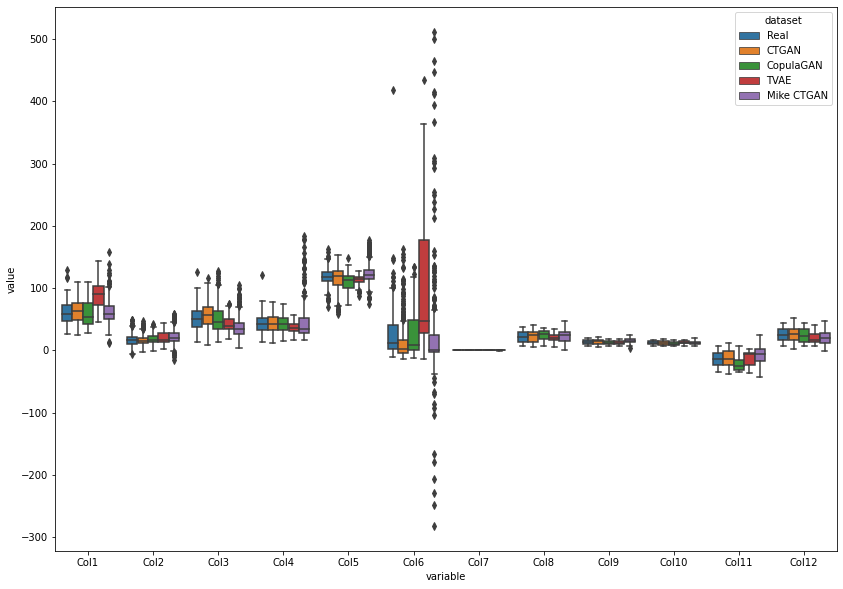

In [79]:
fix, ax = plt.subplots(1, 1, figsize=(14, 10))
sns.boxplot(data=plotting.drop('Class_att', axis=1).melt('dataset'), 
            x='variable', y='value', hue='dataset')


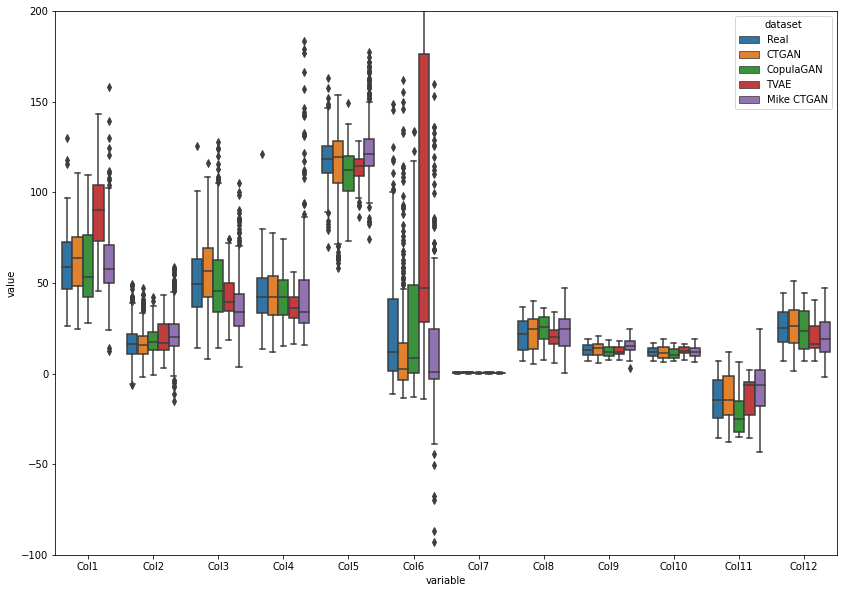

In [82]:
fix, ax = plt.subplots(1, 1, figsize=(14, 10))
sns.boxplot(data=plotting.drop('Class_att', axis=1).melt('dataset'), 
            x='variable', y='value', hue='dataset')
ax.set_ylim((-100, 200));

# Look at other dataset

In [35]:
i_ds2 = SDVInputDataset(filepath='../data/cervical_cancer.csv',
                       header=0)
o_ds2 = SDVOutputDataset(len(i_ds1.dataset))
rp_ds2 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'])

In [37]:
i_ds2.dataset.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


 67%|███████████████████████████████████████████████████████████████████████████████▎                                       | 2/3 [00:00<00:00, 10.44it/s]

Running for ctgan
Running for copulagan


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.57it/s]


Running for tvae


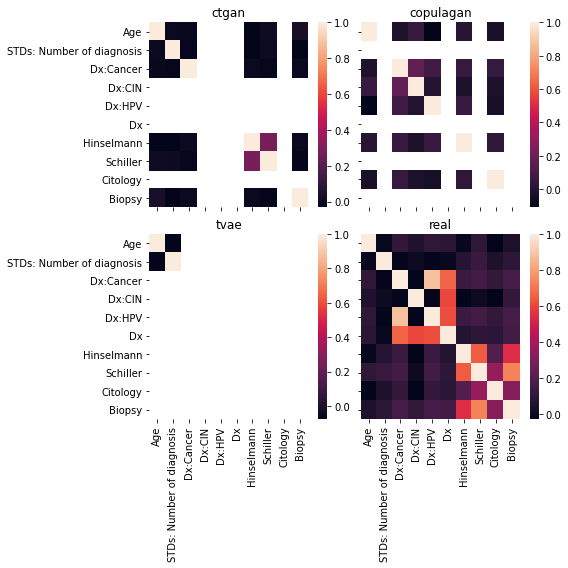

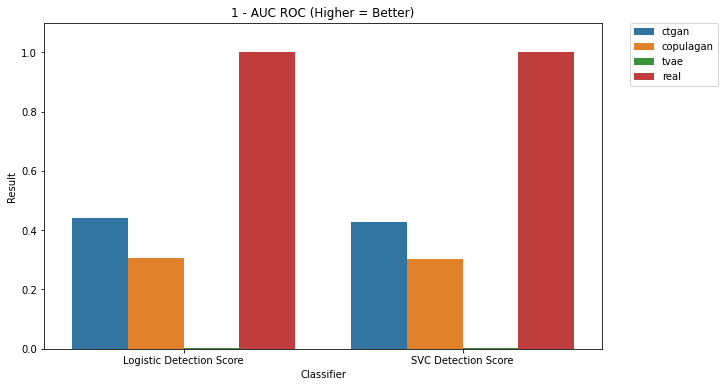

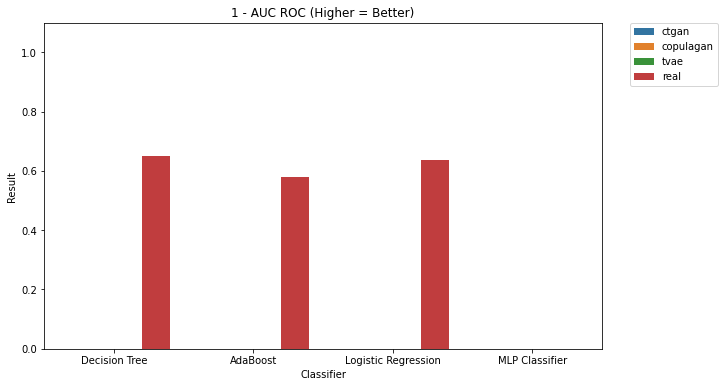

In [38]:
v1_cerv_cancer_df_dict = model_run(input_dataset=i_ds2, 
                                  output_dataset=o_ds2, 
                                  run_params=rp_ds2, 
                                  target_col='Biopsy')

 33%|███████████████████████████████████████▋                                                                               | 1/3 [00:00<00:00,  7.65it/s]

Running for ctgan
Running for copulagan


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.95it/s]


Running for tvae


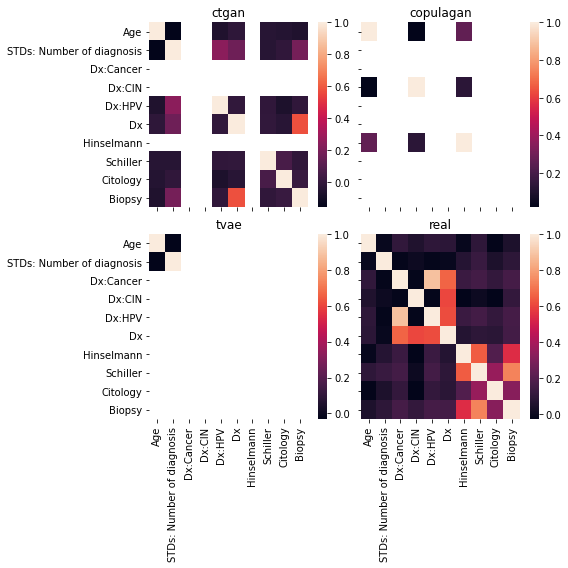

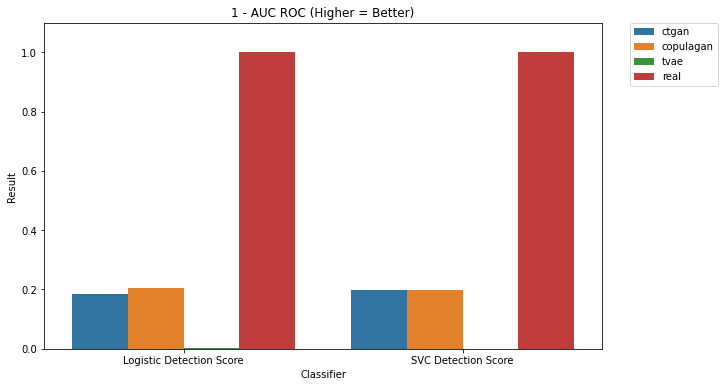

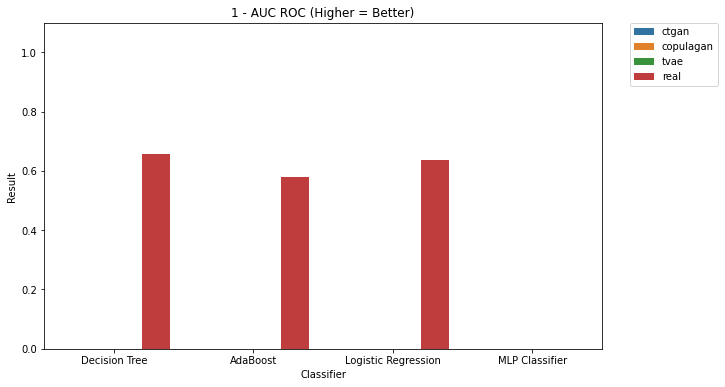

In [39]:
rp2_ds2 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=2000, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256, 256))

v2_cerv_cancer_df_dict = model_run(input_dataset=i_ds2, 
                                   output_dataset=o_ds2, 
                                   run_params=rp2_ds2, 
                                   target_col='Biopsy')